# 보스톤 주택가격 예측 - 다중 회귀 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 산점도와 회귀 곡선 

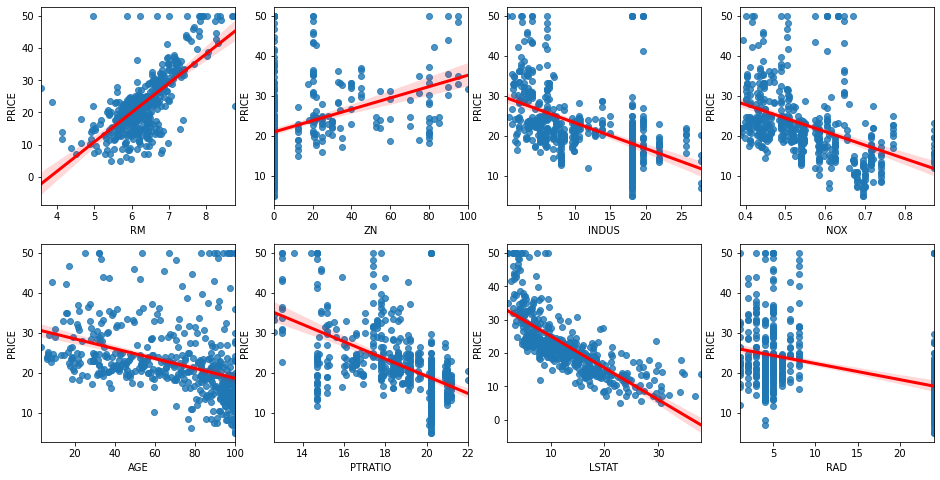

In [11]:
flg, asx = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(features):
    row, col = int(i/4), i%4
    sns.regplot(x=feature, y='PRICE', data = df, line_kws={'color':'red', 'linewidth':3}, ax=asx[row][col])

### 사이킷런 회귀 모델

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=2021
)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
mse, rmse, r2

(23.299928845559034, 4.826999984002386, 0.6352336167833806)

In [16]:
lr.coef_

array([-1.14556718e-01,  5.32342759e-02,  3.28331718e-03,  3.50846504e+00,
       -1.81356668e+01,  3.82523947e+00,  1.10582498e-02, -1.52996739e+00,
        3.39221308e-01, -1.18678336e-02, -8.84214950e-01,  9.52830424e-03,
       -5.78169052e-01])

In [17]:
lr.intercept_

35.07444644384205

### 회귀식
 - PRICE = - 0.11 * CRIM + 0.053 * ZN + 0.0033* INDUS + 3.51 * CHAS	+ - 18.13 * NOX	.... 

### 교차 검증 

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
lr = LinearRegression()
neg_mse = cross_val_score(lr, boston.data, boston.target, scoring='neg_mean_squared_error', cv = 5)
mse = -neg_mse
rmse = np.sqrt(mse)

In [23]:
# 개별 mse 
mse

array([12.46030057, 26.04862111, 33.07413798, 80.76237112, 33.31360656])

In [25]:
# 개별 rmse
rmse

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [24]:
# 평균 rmse 
np.average(rmse)

5.8286589462158185